In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import squarify



# Crimes in Boston
## Records begin in June 14, 2015 and continue to September 3, 2018.

- Real data science, kad grafikai duotu insightus etc. Jeigu neduoda, perdaryti daryti iki tol kol kazka rodo, kad kazka gauni etc
- Good datasets - titanic etc
- textual, datas
- look for correlation targets etc
- Check Colab (alternative to local jupyter)
i -  api vilnius duomenis (Kamsciai pvz)
i - test python scrapper
i - use colab?

Questions to ask?
1. What are most popular crimes? +
2. What are most criminal months? +
3. What are most criminal week days? + 
4. What are most criminal hours of a day? +
5. What are the most popular crimes at night hours? +
6. What are the most criminal areas, streets? +
7. Did crime rate increase from 2017 to 2018?

#### Importing data

In [2]:
df = pd.read_csv('crime.csv', encoding = "ISO-8859-1")

### Checking & understanding file

In [3]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [4]:
df.isnull().values.any()

True

### Choosing needed columns only

In [5]:
crimes = df[['OFFENSE_CODE_GROUP', 'YEAR','MONTH', 'DAY_OF_WEEK', 'HOUR', 'STREET' ]]

In [6]:
crimes.head()

,OFFENSE_CODE_GROUP,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET
0,Larceny,2018,9,Sunday,13,LINCOLN ST
1,Vandalism,2018,8,Tuesday,0,HECLA ST
2,Towed,2018,9,Monday,19,CAZENOVE ST
3,Investigate Property,2018,9,Monday,21,NEWCOMB ST
4,Investigate Property,2018,9,Monday,21,DELHI ST


### Checking quality of data if any values are null

In [7]:
crimes.isnull().values.any()
#some values are null checking which, and to find out if they shall be removed?

True

In [8]:
crimes.isnull().OFFENSE_CODE_GROUP.any()

False

In [9]:
crimes.isnull().YEAR.any()

False

In [10]:
crimes.isnull().DAY_OF_WEEK.any()

False

In [11]:
crimes.isnull().HOUR.any()

False

In [12]:
 
crimes.isnull().STREET.any()

True


### Only streets have missing values, how many?

In [13]:
crimes.STREET.count()
#Total count

308202

In [14]:
crimes.isna().sum()
# 10,871 street values are missing - seems not very important

OFFENSE_CODE_GROUP        0
YEAR                      0
MONTH                     0
DAY_OF_WEEK               0
HOUR                      0
STREET                10871
dtype: int64

### Checking which crimes are most popular & getting 10 top crimes

In [15]:
offense_groups = crimes['OFFENSE_CODE_GROUP'].value_counts()
offense_groups.head()

Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18750
Other                              18075
Name: OFFENSE_CODE_GROUP, dtype: int64

In [16]:
#Crime groups count - Quate a lot
offense_groups.count()

67

### Distribution of crimes

([], <a list of 0 Text yticklabel objects>)

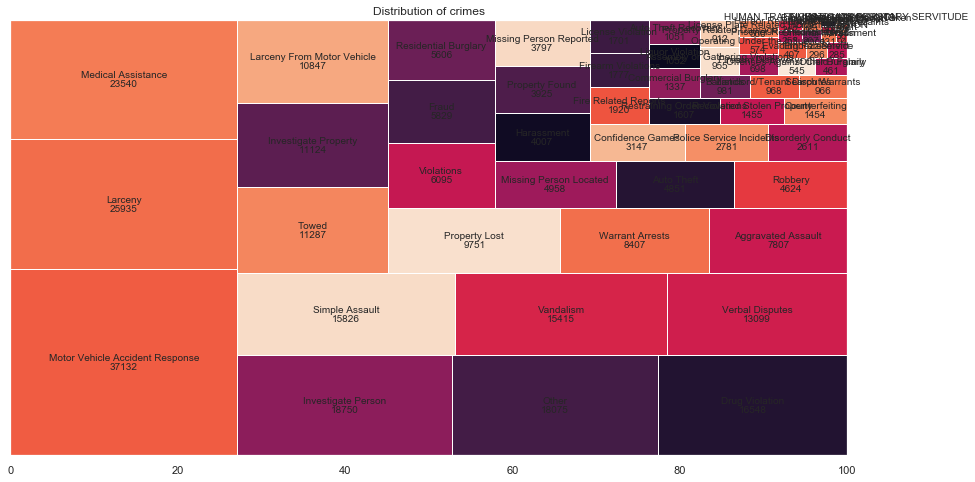

In [17]:
plt.figure(figsize=(15,8))
#count = kiva_loans_data['activity'].value_counts()
squarify.plot(sizes=offense_groups.values,label=offense_groups.index, value=offense_groups.values)
plt.title('Distribution of crimes')
plt.yticks([])

### What are top 10? Reduce to top 10 crime groups

In [18]:
offense_groups_top10 = offense_groups[:10]

In [19]:
offense_groups_top10

Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18750
Other                              18075
Drug Violation                     16548
Simple Assault                     15826
Vandalism                          15415
Verbal Disputes                    13099
Towed                              11287
Name: OFFENSE_CODE_GROUP, dtype: int64

([], <a list of 0 Text yticklabel objects>)

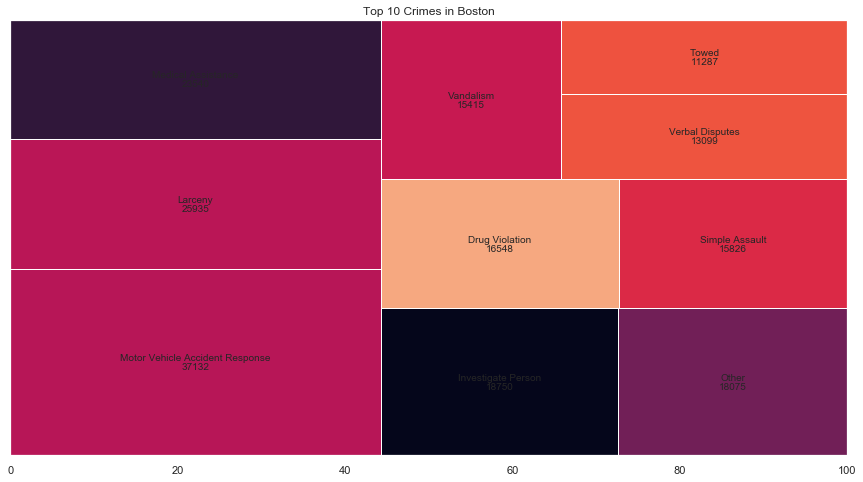

In [20]:
plt.figure(figsize=(15,8))
#count = kiva_loans_data['activity'].value_counts()
squarify.plot(sizes=offense_groups_top10.values,label=offense_groups_top10.index, value=offense_groups_top10.values)
plt.title('Top 10 Crimes in Boston')
plt.yticks([])

Text(0.5, 1.0, 'Top 10 crimes in Boston')

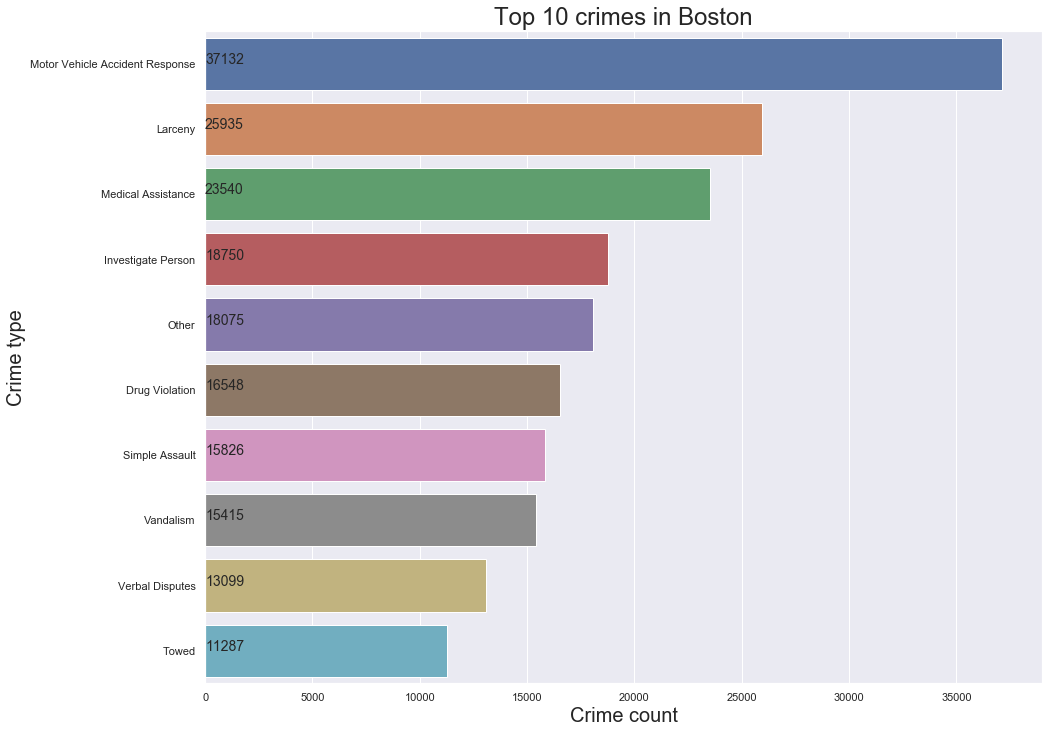

In [21]:
plt.figure(figsize=(15,12))
sns.barplot(offense_groups_top10.values, offense_groups_top10.index)
for i, v in enumerate(offense_groups_top10.values):
    plt.text(0,i,v,fontsize=14)
plt.xlabel('Crime count', fontsize=20)
plt.ylabel('Crime type', fontsize=20)
plt.title('Top 10 crimes in Boston', fontsize=24)

### Top 10 crimes as % of total crimes

In [22]:
sumofcrimes = offense_groups.sum()

In [23]:
top10_as_percent = offense_groups_top10.copy()
#making copy of top 10

In [24]:
top10_as_percent
#checking copy

Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18750
Other                              18075
Drug Violation                     16548
Simple Assault                     15826
Vandalism                          15415
Verbal Disputes                    13099
Towed                              11287
Name: OFFENSE_CODE_GROUP, dtype: int64

In [25]:
#adjusting copy to %
top10_as_percent_list = []
top10_as_percent_index = []
for index, value in top10_as_percent.iteritems():
    top10_as_percent_list.append(round((value/sumofcrimes)*100,2))
    top10_as_percent_index.append(index)

In [26]:
top10_percent = pd.Series(top10_as_percent_list, index=top10_as_percent_index)                                                                                                                             

In [27]:
#top 10 crimes are 61.32% of all crimes.
top10_percent.sum()

61.32

Text(0.5, 1.0, 'Top 10 Crimes in Boston by %')

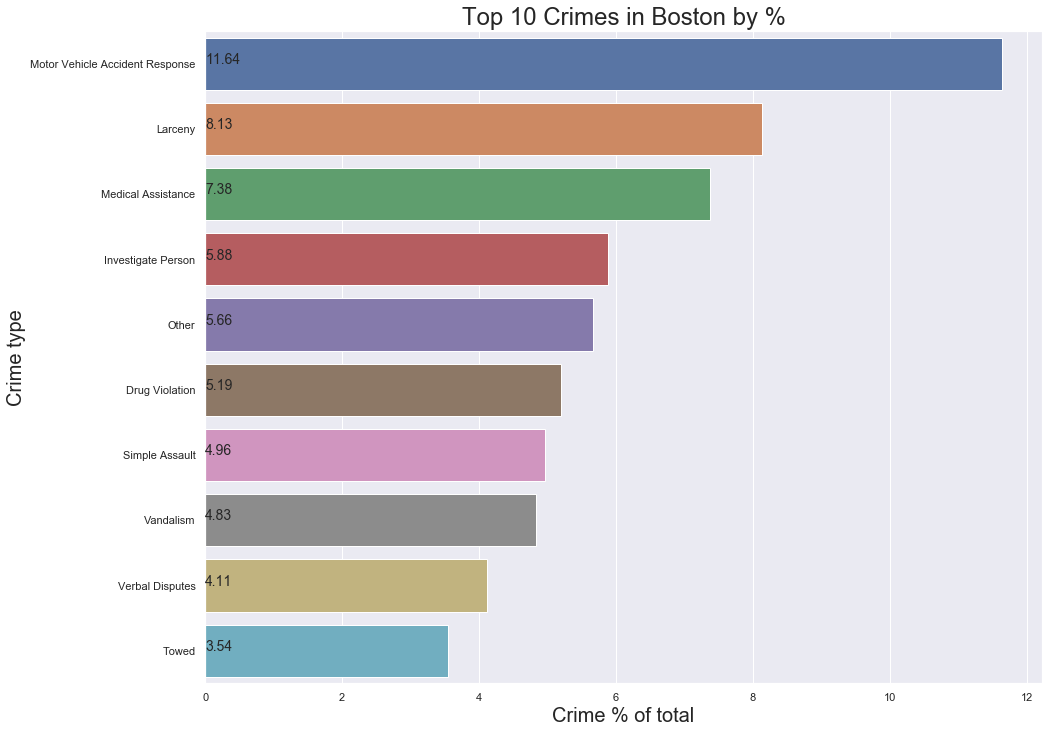

In [28]:
#ax = top10_percent.plot(kind='bar', figsize=(15,16), color="green", fontsize=13);
#ax.set_title("Top 10 Crimes in Boston by %", fontsize=18)
#ax.set_ylabel("Crime %", fontsize=18);
#plt.yticks([])
# set individual bar lables using above list
#for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    #ax.text(i.get_x(), i.get_height(), \
           # str(round((i.get_height()), 2)) + "%", fontsize=15, color='black')
    
    
plt.figure(figsize=(15,12))
sns.barplot(top10_percent.values, top10_percent.index)
for i, v in enumerate(top10_percent.values):
    plt.text(0,i,v,fontsize=14)
plt.xlabel('Crime % of total', fontsize=20)
plt.ylabel('Crime type', fontsize=20)
plt.title('Top 10 Crimes in Boston by %', fontsize=24)

### Checking crimes by month

In [29]:
months_counts = crimes['MONTH'].value_counts()

In [30]:
crimes_by_month = months_counts.rename({1:'January',2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August',9:'September', 10:'October', 11:'November', 12:'December'})

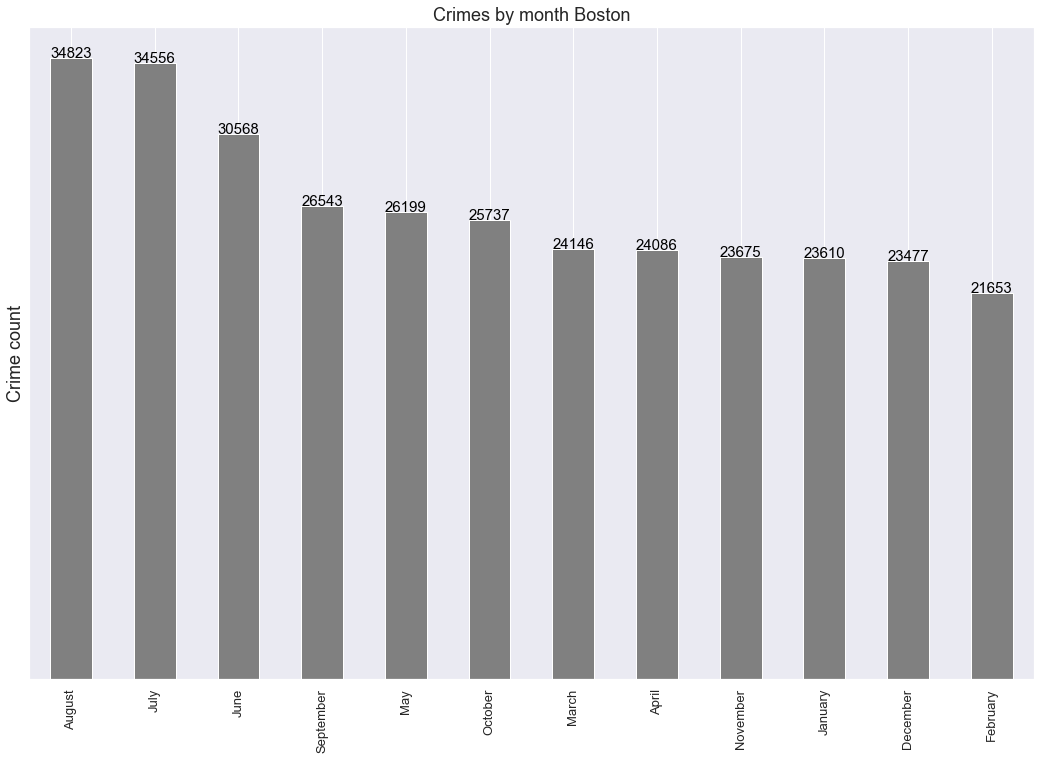

In [31]:

ax1 = crimes_by_month.plot(kind='bar', figsize=(18,12), color="grey", fontsize=13);
ax1.set_title("Crimes by month Boston", fontsize=18)
ax1.set_ylabel("Crime count", fontsize=18);
plt.yticks([])

# set individual bar lables using above list
for i in ax1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax1.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=15, color='black')
    

### Months as % of total crimes

In [32]:
crimes_by_month_percent = crimes_by_month.copy()

crimes_by_month_percent_list = []
crimes_by_month_percent_index = []
for index, value in crimes_by_month_percent.iteritems():
    crimes_by_month_percent_list.append(round((value/sumofcrimes)*100,2))
    crimes_by_month_percent_index.append(index)

months_as_percent = pd.Series(crimes_by_month_percent_list, index=crimes_by_month_percent_index) 

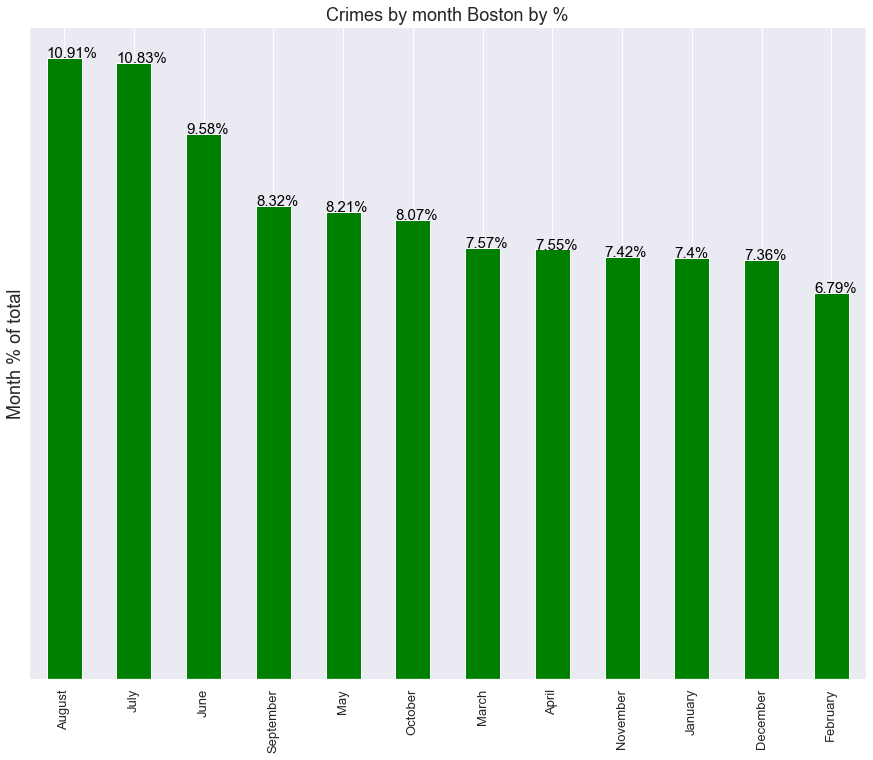

In [33]:
ax = months_as_percent.plot(kind='bar', figsize=(15,12), color="green", fontsize=13);
ax.set_title("Crimes by month Boston by %", fontsize=18)
ax.set_ylabel("Month % of total", fontsize=18);
plt.yticks([])


# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()), 2)) + "%", fontsize=15, color='black')

### Checking crimes by days of the week 

In [34]:
crime_week_days = crimes['DAY_OF_WEEK'].value_counts()

In [35]:
crime_week_days

Friday       48495
Wednesday    46729
Thursday     46656
Tuesday      46383
Monday       45679
Saturday     44818
Sunday       40313
Name: DAY_OF_WEEK, dtype: int64

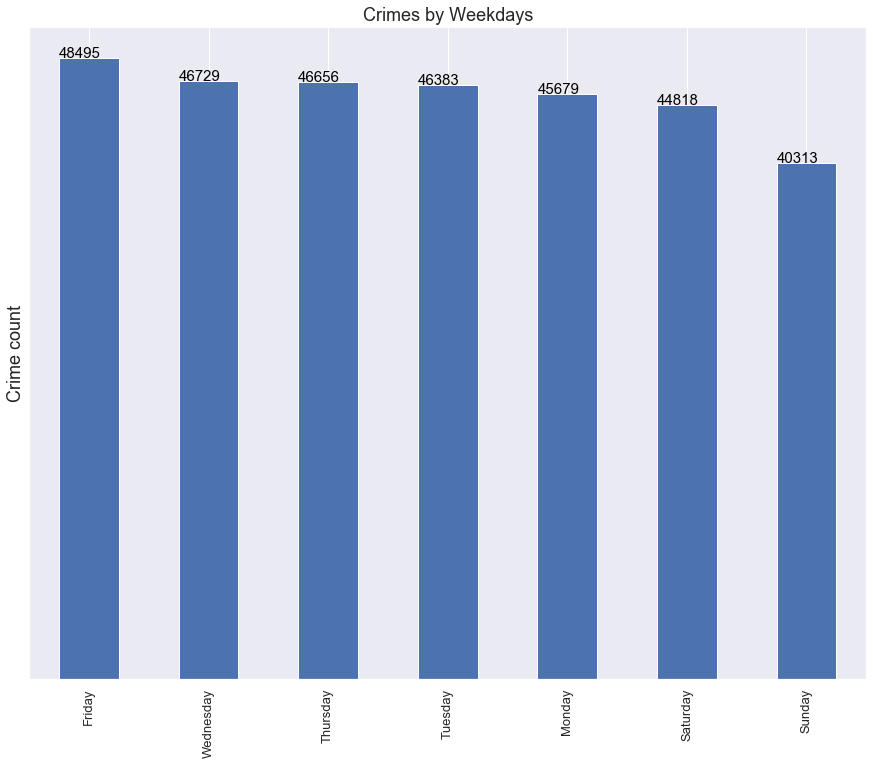

In [36]:
ax = crime_week_days.plot(kind='bar', figsize=(15,12),  fontsize=13);
ax.set_title("Crimes by Weekdays", fontsize=18)
ax.set_ylabel("Crime count", fontsize=18);
plt.yticks([])

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=15, color='black')

### Finding times when most crime is commited
Time intervals

00:00 - 06:00

06:00 - 12:00

12:00 - 18:00

18:00 - 24:00

In [37]:
interval00to06 = crimes[crimes['HOUR'] < 6]
interval06to12 = crimes[(crimes['HOUR'] < 12) & (crimes['HOUR'] > 6)]
interval12to18 = crimes[(crimes['HOUR'] > 12) & (crimes['HOUR'] < 18)]
interval18 = crimes[crimes['HOUR'] > 18]

In [38]:
zerotosix = len(interval00to06.index)
sixtotwelve = len(interval06to12.index)
twelwetosix = len(interval12to18.index)
sixtomid = len(interval18.index)
hourslsit = [zerotosix,sixtotwelve, twelwetosix,sixtomid]
interval_series = pd.Series(hourslsit)
index_ = ['00:00 to 06:00','06:00 to 12:00', '12:00 to 18:00', '18:00 to 24:00']
interval_series.index = index_

In [39]:
interval_series

00:00 to 06:00    43376
06:00 to 12:00    69428
12:00 to 18:00    91191
18:00 to 24:00    71071
dtype: int64

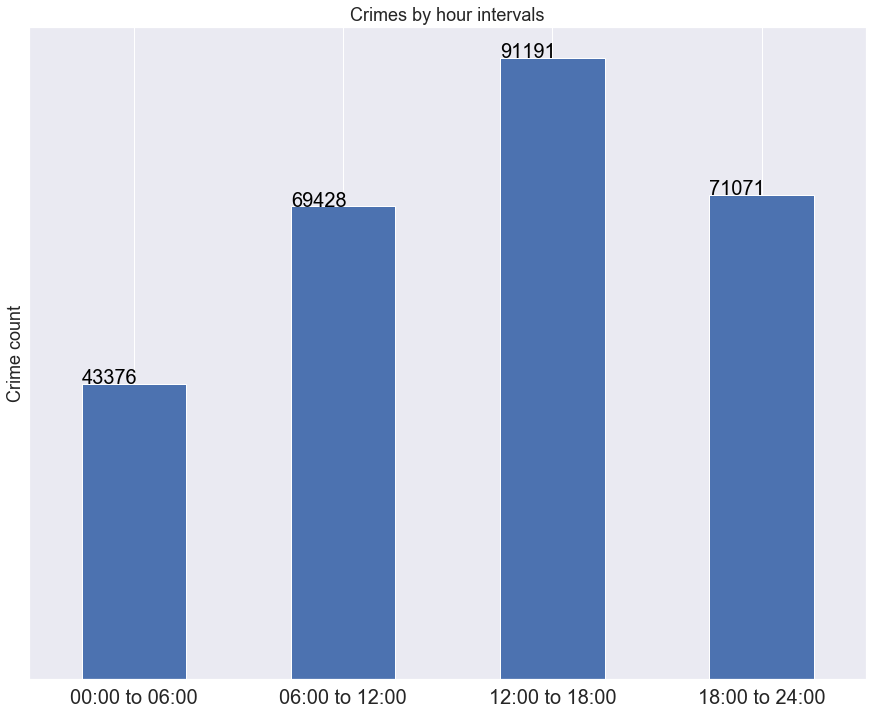

In [40]:

ax = interval_series.plot(kind='bar', figsize=(15,12), fontsize=20);
ax.set_title("Crimes by hour intervals", fontsize=18)
ax.set_ylabel("Crime count", fontsize=18);
plt.yticks([])
plt.xticks(rotation='horizontal')


# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=20, color='black')


### Crimes per HOUR

In [41]:
crime_hours = crimes['HOUR'].value_counts()
#crime_hours

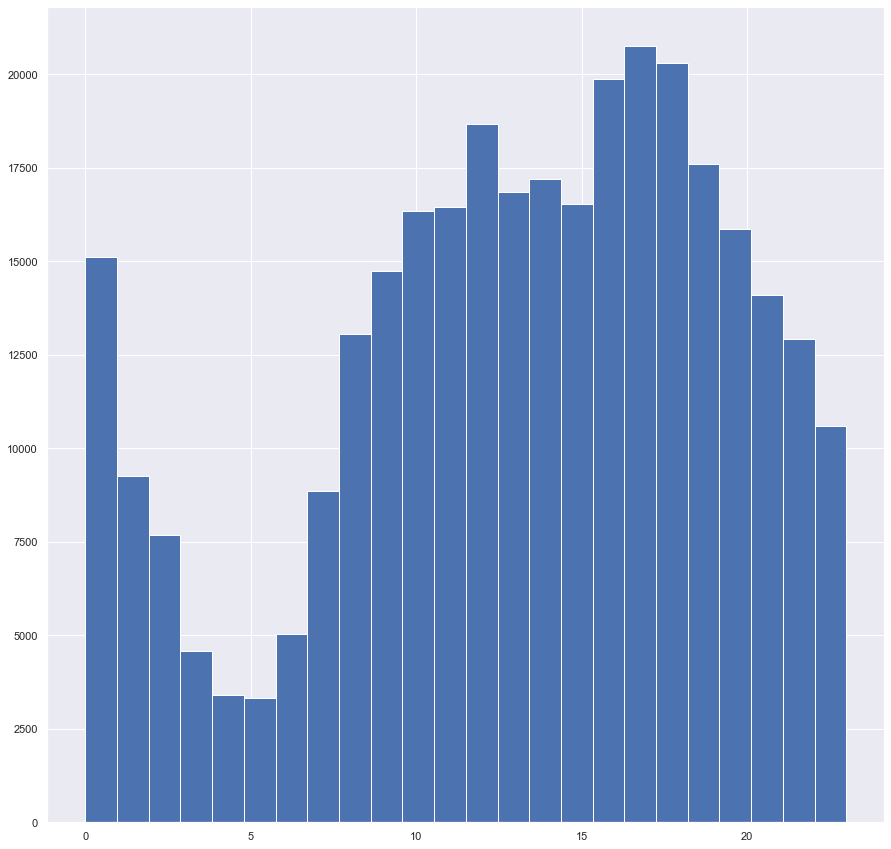

In [42]:
plt.figure(figsize=(15,15))
#sns.barplot(crime_hours.index, crime_hours.values )
crimes['HOUR'].hist(bins=24)
#sns.distplot(crimes['HOUR'], bins=26)

## Top 10 crimes at night between 23:00 - 06:00

In [43]:
mask1 = crimes[crimes['HOUR'] >= 23]
mask2 = crimes[crimes['HOUR'] < 6]
df_all_rows = pd.concat([mask1, mask2])


In [44]:
new_offense_groups = df_all_rows['OFFENSE_CODE_GROUP'].value_counts()
new_offense_groups = new_offense_groups[:10]

Text(0.5, 1.0, '10 Most popular crimes for 23:00 - 06:00')

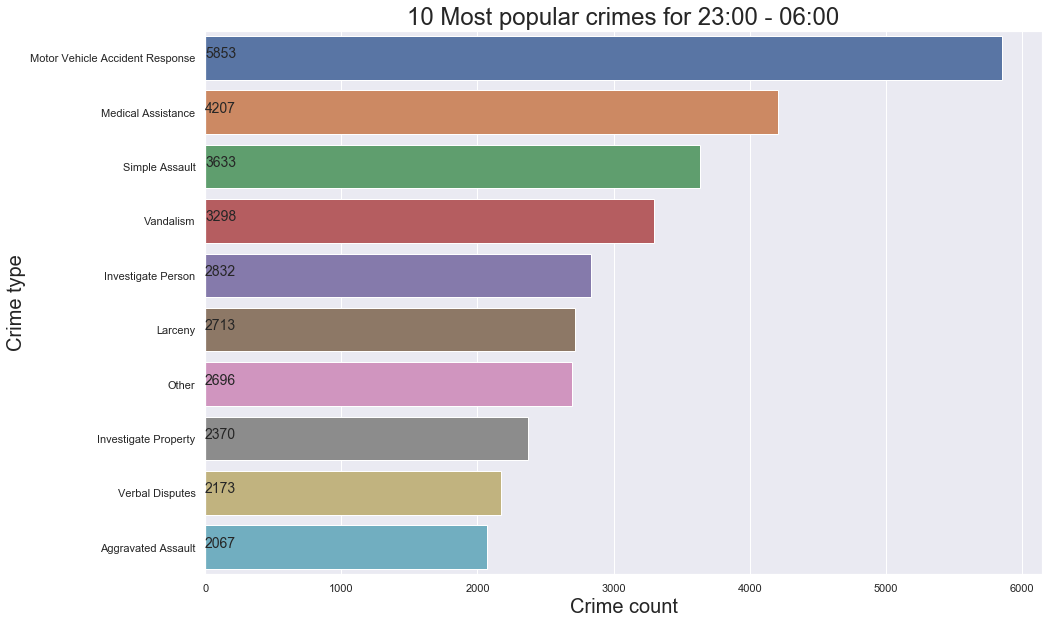

In [45]:
#plt.figure(figsize=(15,16))
#g = sns.barplot(new_offense_groups.index, new_offense_groups.values, palette="pastel").set_title('10 Most popular crimes')
plt.figure(figsize=(15,10))
sns.barplot(new_offense_groups.values, new_offense_groups.index)
for i, v in enumerate(new_offense_groups.values):
    plt.text(0,i,v,fontsize=14)
plt.xlabel('Crime count', fontsize=20)
plt.ylabel('Crime type', fontsize=20)
plt.title('10 Most popular crimes for 23:00 - 06:00', fontsize=24)
#seems nothing so different, same standard crimes

### Box plot - Crimes per days of week and their times

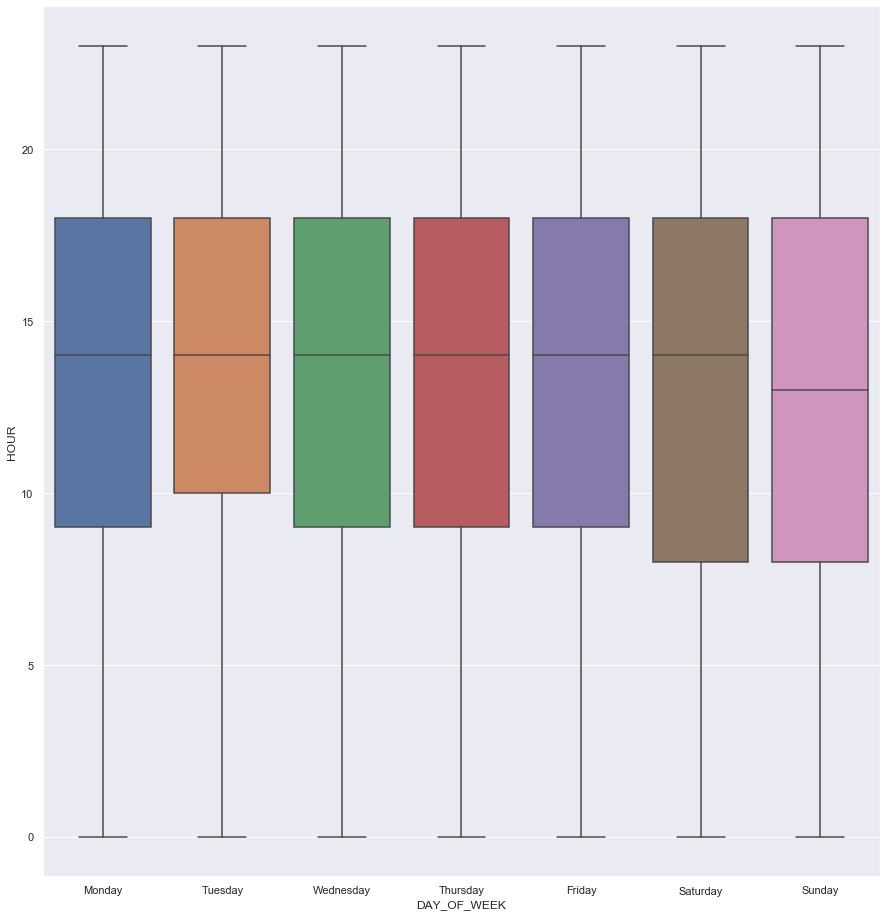

In [46]:
plt.figure(figsize=(15,16))
#sns.violinplot(x = crimes['DAY_OF_WEEK'], y=crimes['HOUR'], order=["Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday","Sunday" ])
sns.boxplot(x = crimes['DAY_OF_WEEK'], y=crimes['HOUR'], order=["Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday","Sunday" ])

### Crimes by street - top 5 Most dangerous streets

In [47]:
dangerous_streets = crimes['STREET'].value_counts()

In [48]:
top5_streets = dangerous_streets[0:5]

In [49]:
dangerous_streets.describe()

count     4657.000000
mean        66.180374
std        350.219857
min          1.000000
25%          2.000000
50%         11.000000
75%         41.000000
max      14194.000000
Name: STREET, dtype: float64

Text(0.5, 1.0, 'Distribution of Streets')

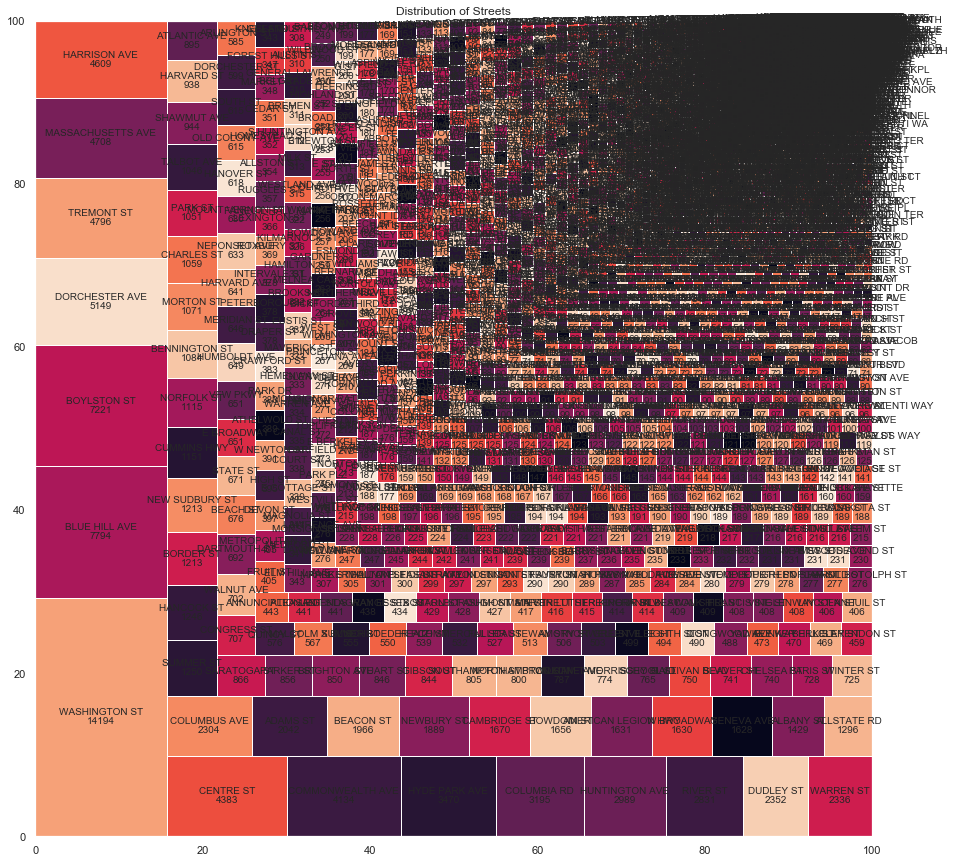

In [50]:
plt.figure(figsize=(15,15))
#count = kiva_loans_data['activity'].value_counts()
squarify.plot(sizes=dangerous_streets.values,label=dangerous_streets.index, value=dangerous_streets.values)
plt.title('Distribution of Streets')